<a href="https://colab.research.google.com/github/harrislam1/BasicNeuralNetworkStockPrediction/blob/main/BasicNeuralNetworkStockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Money's made of paper so it grows on trees. Instead of cutting off the roots, just branch out.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [ ]:
#load data
#change company name to any stock "ticker" symbol you want. Use google to find appropriate ticker symbol
#this loads the yahoo finance stock prices
#yahoo lets us get their stock data for free, but there are limits of how many times we can request data per day
company = 'TSLA'

start =dt.datetime(2018,1,1)
end=dt.datetime(2020,12,31)

data=web.DataReader(company,'yahoo', start, end)
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,64.421997,62.200001,62.400002,64.106003,21761000.0,64.106003
2018-01-03,65.050003,63.110001,64.199997,63.450001,22607500.0,63.450001
2018-01-04,63.709999,61.136002,62.574001,62.924000,49731500.0,62.924000
2018-01-05,63.448002,62.400002,63.324001,63.316002,22956000.0,63.316002
2018-01-08,67.403999,63.099998,63.200001,67.281998,49297000.0,67.281998
...,...,...,...,...,...,...
2020-12-24,666.090027,641.000000,642.989990,661.770020,22865600.0,661.770020
2020-12-28,681.400024,660.799988,674.510010,663.690002,32278600.0,663.690002
2020-12-29,669.900024,655.000000,661.000000,665.989990,22910800.0,665.989990


Epoch 1/25
22/22 [==============================] - 8s 94ms/step - loss: 0.0344
Epoch 2/25
22/22 [==============================] - 2s 110ms/step - loss: 0.0042
Epoch 3/25
22/22 [==============================] - 3s 126ms/step - loss: 0.0023
Epoch 4/25
22/22 [==============================] - 3s 136ms/step - loss: 0.0027
Epoch 5/25
22/22 [==============================] - 3s 140ms/step - loss: 0.0021
Epoch 6/25
22/22 [==============================] - 3s 130ms/step - loss: 0.0021
Epoch 7/25
22/22 [==============================] - 4s 176ms/step - loss: 0.0022
Epoch 8/25
22/22 [==============================] - 3s 128ms/step - loss: 0.0021
Epoch 9/25
22/22 [==============================] - 3s 158ms/step - loss: 0.0021
Epoch 10/25
22/22 [==============================] - 3s 145ms/step - loss: 0.0018
Epoch 11/25
22/22 [==============================] - 4s 171ms/step - loss: 0.0025
Epoch 12/25
22/22 [==============================] - 3s 140ms/step - loss: 0.0023
Epoch 13/25
22/22 [=======

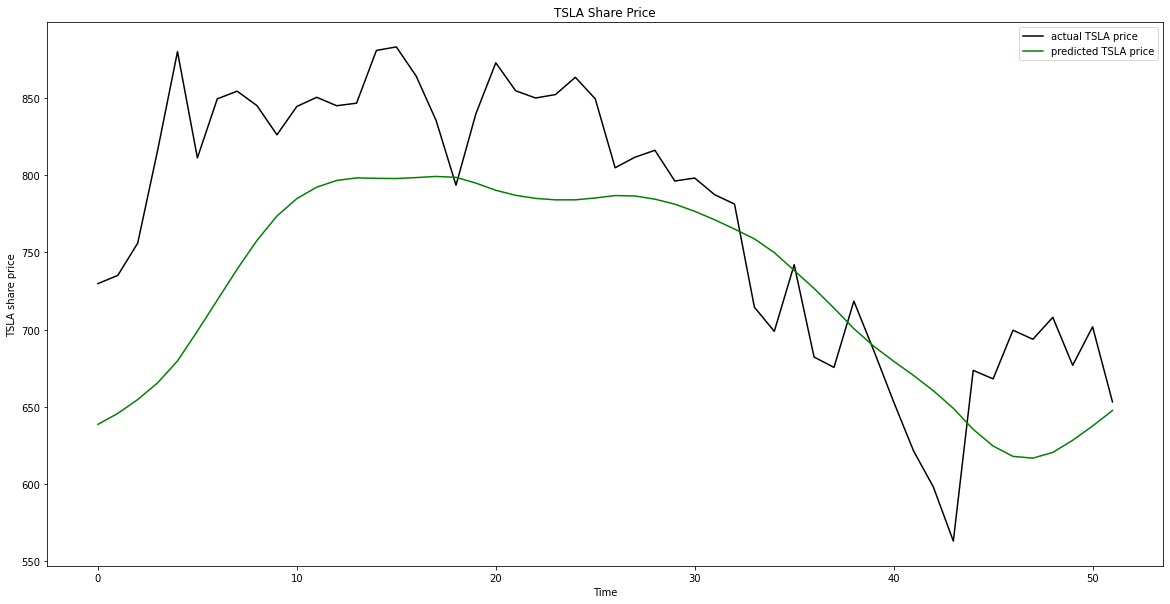

In [ ]:
#prepare data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

prediction_days=60

x_train=[]
y_train=[]

for x in range(prediction_days, len(scaled_data)):
  x_train.append(scaled_data[x-prediction_days:x,0])
  y_train.append(scaled_data[x,0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))

#build super basic model
model = Sequential()

model.add(LSTM(units=50, return_sequences=True,  input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1)) #prediction of next closing price value

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=25, batch_size=32) #32 units 24 times

#Test model accuracy on existing data

#load test data
test_start=dt.datetime(2021,1,1)
test_end=dt.datetime(2021,3,18)

test_data = web.DataReader(company, 'yahoo', test_start, test_end)
actual_prices=test_data['Close'].values

total_dataset=pd.concat((data['Close'], test_data['Close']), axis=0)

model_inputs = total_dataset[len(total_dataset)-len(test_data)-prediction_days:].values
model_inputs=model_inputs.reshape(-1,1)
model_inputs=scaler.transform(model_inputs)

# make predictions on test data

x_test=[]

for x in range(prediction_days, len(model_inputs)):
  x_test.append(model_inputs[x-prediction_days:x, 0])

x_test = np.array(x_test)
x_test=np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

predicted_prices = model.predict(x_test)
predicted_prices=scaler.inverse_transform(predicted_prices)

#plot test predictions
plt.figure(figsize=(20,10))
plt.plot(actual_prices, color='black', label=f"actual {company} price")
plt.plot(predicted_prices, color='green', label=f"predicted {company} price")
plt.title(f"{company} Share Price")
plt.xlabel('Time')
plt.ylabel(f"{company} share price")
plt.legend()
plt.show()

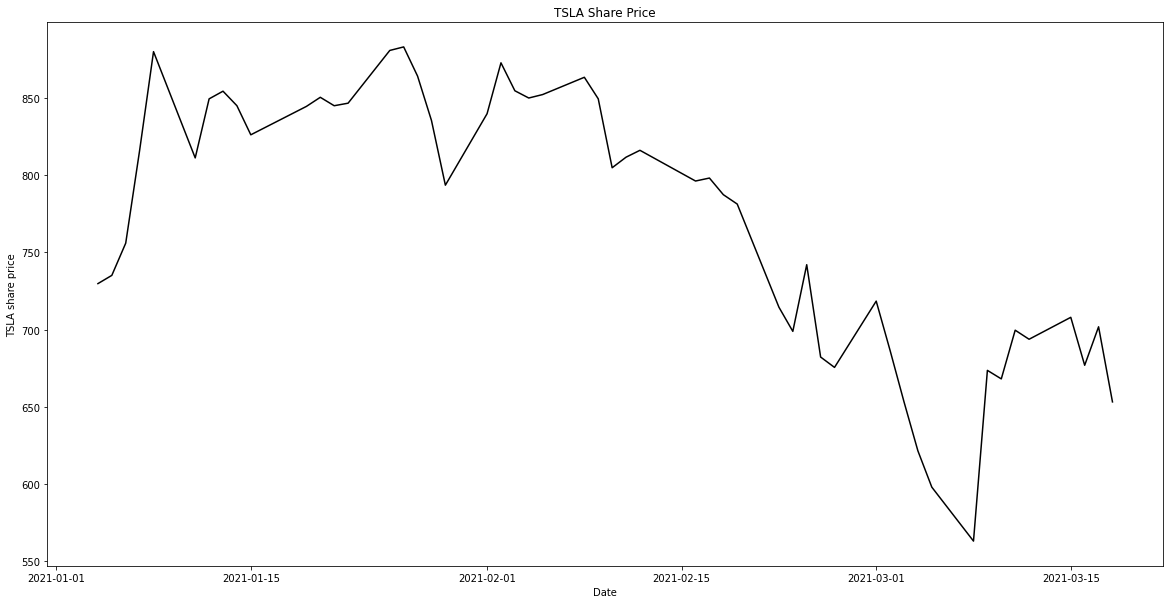

In [ ]:
#making sure previous plot of "actual_data" is correct by plotting the test_data variable
plt.figure(figsize=(20,10))
plt.plot(test_data.Close, color='black')
plt.title(f"{company} Share Price")
plt.xlabel('Date')
plt.ylabel(f"{company} share price")
plt.show()

In [ ]:
len(test_data)==len(predicted_prices)

True

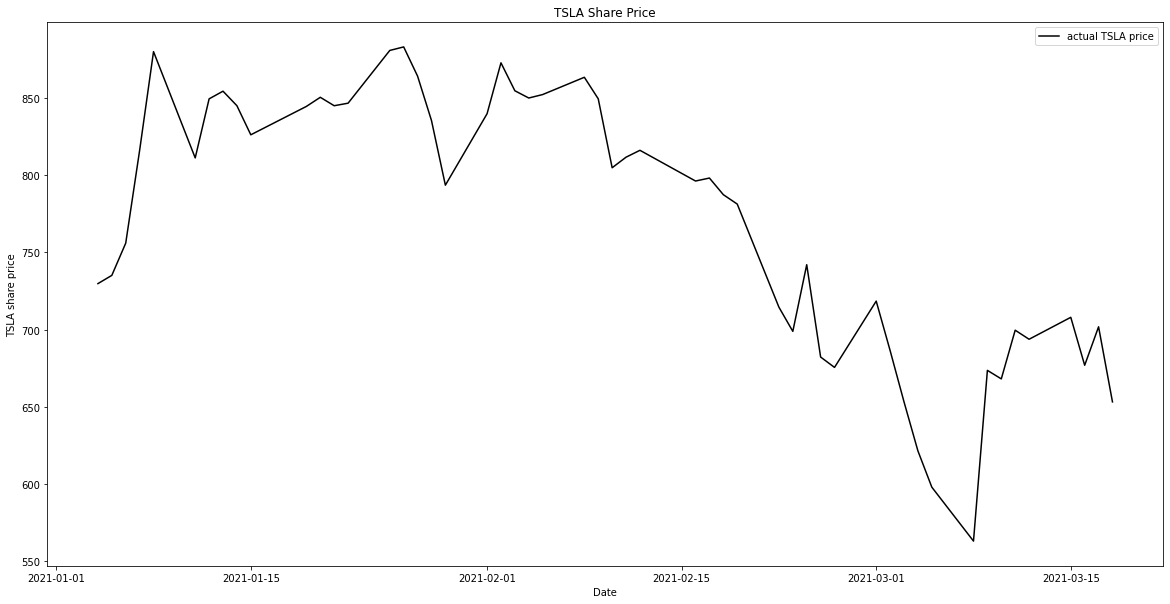

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(test_data.index, actual_prices, color='black', label=f"actual {company} price")
#plt.plot(test_data.index, predicted_prices, color='green', label=f"predicted {company} price")
plt.title(f"{company} Share Price")
plt.xlabel('Date')
plt.ylabel(f"{company} share price")
plt.legend()
plt.show()

In [ ]:
#make predictions of "future day" which is today's price.
#as of 530pm of March 19, 2021 TSLA stock price was 654.87
#this model predicted 686.97
real_data=[model_inputs[len(model_inputs)+1-prediction_days:len(model_inputs+1),0]]
real_data=np.array(real_data)
real_data=np.reshape(real_data,(real_data.shape[0], real_data.shape[1],1))

prediction=model.predict(real_data)
prediction=scaler.inverse_transform(prediction)
print(f"prediction: {prediction}")

prediction: [[686.9672]]
